In [1]:
# Imports necesarios para el notebook
from random import seed

from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp

# Siempre seteamos la seed de aleatoridad para que los # resultados sean reproducibles
seed(12345)
np.random.seed(12345)

sns.set_theme()

In [2]:
from util import time_algorithm


In [3]:
from main import juego_monedas

In [4]:
def get_random_array(size: int):
    return np.random.randint(0, 1000, size) # valores entre 0 y 1000
# La variable x van a ser los valores del eje x de los gráficos en todo el notebook
# Tamaño mínimo=100, tamaño máximo=100k, cantidad de puntos=200
x = np.linspace(100, 100000, 200).astype(int)

# medimos el tiempo de ejecucion para una serie de 100 a 10 millones de puntos respecto al tamaño de la muestra
results = time_algorithm(juego_monedas, x, lambda s: [get_random_array(s)])

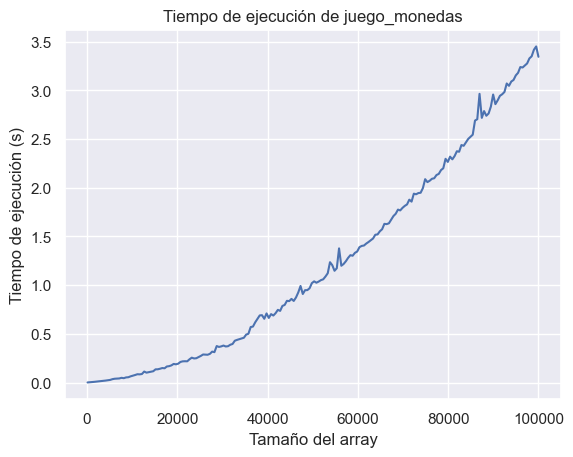

In [5]:
# pasamos los datos de tiempo/tamanio de muestra a un grafico
ax: plt.Axes
fig, ax = plt.subplots()
ax.plot(x, [results[i] for i in x], label="Medición")
ax.set_title('Tiempo de ejecución de juego_monedas')
ax.set_xlabel('Tamaño del array')
ax.set_ylabel('Tiempo de ejecución (s)')
None

Y utilizando un ajuste por cuadrados minimos, buscamos hallar el error de nuestra curva

In [6]:
# aprovechando el uso de funciones de scipy:
f_nlogn = lambda x, c1, c2: c1 * x * np.log(x) + c2 
f_n2 = lambda x, c1, c2: c1 * x**2 + c2
#f_n = lambda x, c1, c2: c1 * x + c2
# Correcciones por nlog(n) y n^2
c_nlogn, _ = sp.optimize.curve_fit(f_nlogn, x, [results[n] for n in x])
c_n2, _ = sp.optimize.curve_fit(f_n2, x, [results[n] for n in x])
#c_n, _ = sp.optimize.curve_fit(f_n, x, [results[n] for n in x])

<>:5: SyntaxWarning: invalid escape sequence '\l'
<>:5: SyntaxWarning: invalid escape sequence '\l'
C:\Users\Joaquin H\AppData\Local\Temp\ipykernel_28940\1400353146.py:5: SyntaxWarning: invalid escape sequence '\l'
  ax.plot(x, [f_nlogn(n, c_nlogn[0], c_nlogn[1]) for n in x], 'r--', label="Ajuste $n \log(n)$")


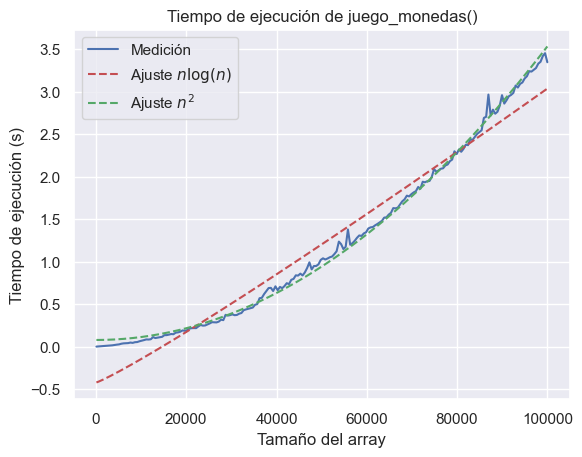

In [9]:
# llevamos las correcciones a un grafico:
ax: plt.Axes
fig, ax = plt.subplots()
ax.plot(x, [results[n] for n in x], label="Medición")
ax.plot(x, [f_nlogn(n, c_nlogn[0], c_nlogn[1]) for n in x], 'r--', label="Ajuste $n \log(n)$")
ax.plot(x, [f_n2(n, c_n2[0], c_n2[1]) for n in x], 'g--', label="Ajuste $n^2$")
#ax.plot(x, [f_n(n, c_n[0], c_n[1]) for n in x], 'b--', label="Ajuste $n$")
ax.set_title('Tiempo de ejecución de juego_monedas()')
ax.set_xlabel('Tamaño del array')
ax.set_ylabel('Tiempo de ejecución (s)')
ax.legend()
None

Error cuadrático total para n log(n): 7.83788182962596
Error cuadrático total para n^2: 0.6035098261796354


<>:12: SyntaxWarning: invalid escape sequence '\l'
<>:12: SyntaxWarning: invalid escape sequence '\l'
C:\Users\Joaquin H\AppData\Local\Temp\ipykernel_28940\1427858494.py:12: SyntaxWarning: invalid escape sequence '\l'
  ax.plot(x, errors_nlogn, label="Ajuste $n \log(n)$")


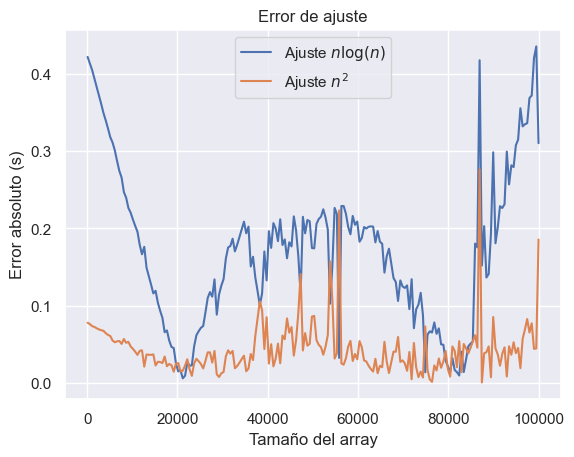

In [10]:
# curvas de error del algoritmo respecto a las correcciones anteriores:
errors_nlogn = [np.abs(c_nlogn[0] * n * np.log(n) + c_nlogn[1] - results[n]) for n in x]
errors_n2 = [np.abs(c_n2[0] * n**2 + c_n2[1] - results[n]) for n in x]
#errors_n = [np.abs(c_n[0] * n + c_n2[1] - results[n]) for n in x]

print(f"Error cuadrático total para n log(n): {np.sum(np.power(errors_nlogn, 2))}")
print(f"Error cuadrático total para n^2: {np.sum(np.power(errors_n2, 2))}")
#print(f"Error cuadrático total para n linear: {np.sum(np.power(errors_n, 2))}")

ax: plt.Axes
fig, ax = plt.subplots()
ax.plot(x, errors_nlogn, label="Ajuste $n log(n)$")
ax.plot(x, errors_n2, label="Ajuste $n^2$")
#ax.plot(x, errors_n, label="Ajuste $n$")
ax.set_title('Error de ajuste')
ax.set_xlabel('Tamaño del array')
ax.set_ylabel('Error absoluto (s)')
ax.legend()
None